# MSDS 432, Assignment 1 - Search Performance

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import matplotlib.style as style

In [3]:
np.random.seed(323) # static seed so results are reproducible

In [4]:
style.use('seaborn-poster') # sets the size of the charts
style.use('ggplot') # set the theme for matplotlib

In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Search Algorithms

In [6]:
def binary_search(list, item):
    """Binary Search O(log(N))"""
    # low and high keep track of which part of the list you'll search in.
    low = 0
    high = len(list) - 1

    # While you haven't narrowed it down to one element ...
    while low <= high:
        # ... check the middle element
        mid = (low + high) // 2
        guess = list[mid]
        # Found the item.
        if guess == item:
            return mid
        # The guess was too high.
        if guess > item:
            high = mid - 1
        # The guess was too low.
        else:
            low = mid + 1

    # Item doesn't exist
    return None

def linear_search(list, item):
    """Linear Search O(N)"""
    # simple, brute force linear search
    for index in range(0, len(list)):
        if list[index] == item:
            return index
        
    #  Item doesn't exist
    return None

def profile(func):
    start_time = time()
    func()
    return time() - start_time

## Benchmark

In [7]:
# Create the output metrics DataFrame
results = pd.DataFrame(columns = ['Length', 'Sort', 'Linear Search', 'Binary Search', 'Linear Search & Sort', 'Binary Search & Sort']) 

In [8]:
offset = 9 # offset for array size generation

for index in range(0, 5):
    array_size = 2**(index+offset) # calculate array size
    ds = np.random.uniform(0, 9, array_size) # generate it

    sort_time = profile(lambda: ds.sort()) # capture time to sort the array
    
    to_find = max(ds) # element to find
    
    linear_time = profile(lambda: linear_search(ds, to_find)) # time the linear search
    binary_time = profile(lambda: binary_search(ds, to_find)) # time the binary search
    
    assert linear_search(ds, to_find) == binary_search(ds, to_find) # ensure we get the same results for both search methods.

    results.loc[index] = [array_size, sort_time, linear_time, binary_time, linear_time + sort_time, binary_time + sort_time]

## Results

In [9]:
results # display the results table / DataFrame

,Length,Sort,Linear Search,Binary Search,Linear Search & Sort,Binary Search & Sort
0,512.0,0.0,0.000000,0.0,0.000000,0.0
1,1024.0,0.0,0.000000,0.0,0.000000,0.0
2,2048.0,0.0,0.000000,0.0,0.000000,0.0
3,4096.0,0.0,0.000000,0.0,0.000000,0.0
4,8192.0,0.0,0.001029,0.0,0.001029,0.0


## Summary

The two search methodologies in comparison here, linear and binary, exhibit drastically different behavior as the input size to the algorithms increase. Since our benchmark analysis always searches for the highest number in the input sequence, this will always produce the worst-case runtime for the linear search algorithm due to it having to examine every single element. If the experiment were inverted, and we were always searching for the smallest element, the linear search would outperform the binary search on an individual step by step comparison.
However, a key assumption in the analysis of algorithms is to always assume the worst-case input because when your software is in production, there is no control over what inputs will be executed. This kind of analysis is often referred to as asymptotic analysis, where we examine how an algorithms runtime increases relative to the size of the input. The most common formal notation is called “Big Oh”, were we establish a maximum upper bound on how long a given algorithm will take to run relative to its input size.

In the two cases we looked at here, the linear search is “O(N)”, also known as linear time and the binary search is “O(log n)”, or logarithmic time. The datasets we used in this experiment are extremely small so the runtime differences may not seem drastically different in the table above. However, if we started using inputs in the range of billions of elements it would take orders of magnitude more time for the linear search to complete over the binary search due to the scaling factor. 
This behavior is better displayed in the chart below, where the binary search stays flat throughout the different inputs and the linear search starts to spike drastically after around only four-thousand elements. 

Another key assumption we must establish is that the input set is sorted in numerical order, this is how the binary search is able to execute must faster than its linear search companion. The linear search would still perform in “O(N)” time regardless of the input being sorted or not because every element must be examined. However, by sorting the input first, which requires O(n log n) time to perform, we are able to divide the entire input dataset into two distinct parts on each iteration through the algorithm thereby enabling efficient iteration through the dataset in large chucks, instead of sequentially.

Although the sorting operation does require more time than the binary search itself as the input size grows, especially to large numbers, the relative additional overhead is a trivial one-time cost that will drastically out-perform the brute force, linear search approach for even moderately sized values of N.

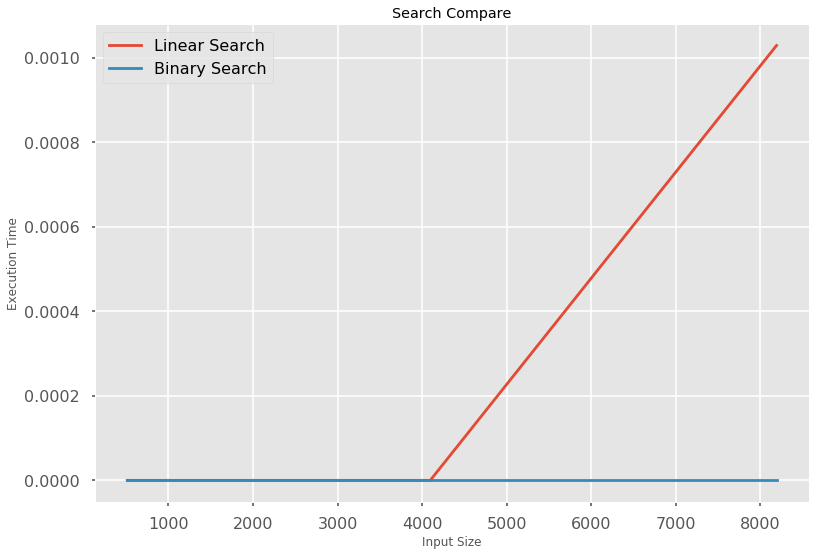

In [10]:
# Chart the relevant metrics about the two algorithms in comparision.
ax = results[['Length', 'Linear Search', 'Binary Search']].plot.line(x='Length', title='Search Compare')
ax.set_xlabel('Input Size')
ax.set_ylabel('Execution Time')
plt.show()